<a href="https://colab.research.google.com/github/aa4758/pytorch/blob/master/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# Iris Data Set
# https://archive.ics.uci.edu/dataset/53/iris

In [31]:
import torch
import torch.nn as nn                 # neural network
import torch.nn.functional as F       # help data to move forward in function

In [32]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) --> Hidden layer1 (number of neurons) --> H2 (n) --> (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()            # instantiate nn.module

    # Create layers
    self.fc1 = nn.Linear(in_features, h1)     # Input layer --> H1
    self.fc2 = nn.Linear(h1, h2)              # H1 --> H2
    self.out = nn.Linear(h2, out_features)    # H2 --> Output

  def forward(self, x):
    x = F.relu(self.fc1(x))       # relu : if the output is lt 0, it's 0. otherwise keep the output
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [33]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of model
model = Model()

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [36]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [37]:
# Change last column from string to integers
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [38]:
# Train Test Split, Set X, y
X = my_df.drop('species', axis=1)       # Input Data
y = my_df['species']                    # Output Data

In [39]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [40]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [41]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# Train Test Split
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)     # split the data by 2:8 to X_train and X_test, y_train and y_test.
                                                                                                  # X_train and y_train have same position values. X_test and y_test as well

In [44]:
X_train

array([[5.7, 2.6, 3.5, 1. ],
       [6.5, 2.8, 4.6, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [5.5, 2.6, 4.4, 1.2],
       [6.7, 3. , 5.2, 2.3],
       [5.8, 4. , 1.2, 0.2],
       [6.9, 3.1, 5.1, 2.3],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 5.4, 2.1],
       [5.9, 3.2, 4.8, 1.8],
       [6.2, 2.9, 4.3, 1.3],
       [5.7, 2.8, 4.5, 1.3],
       [5.2, 4.1, 1.5, 0.1],
       [6.5, 3. , 5.8, 2.2],
       [6.3, 3.4, 5.6, 2.4],
       [5.7, 3.8, 1.7, 0.3],
       [6.7, 2.5, 5.8, 1.8],
       [5.1, 2.5, 3. , 1.1],
       [4.8, 3. , 1.4, 0.3],
       [6.2, 2.2, 4.5, 1.5],
       [6.4, 2.7, 5.3, 1.9],
       [5.8, 2.7, 3.9, 1.2],
       [7.4, 2.8, 6.1, 1.9],
       [5.2, 3.5, 1.5, 0.2],
       [5.5, 4.2, 1.4, 0.2],
       [5.9, 3. , 5.1, 1.8],
       [6.2, 2.8, 4.8, 1.8],
       [4.6, 3.1, 1.5, 0.2],
       [5.6, 3. , 4.5, 1.5],
       [4.6, 3.4, 1.4, 0.3],
       [4.9, 3.1, 1.5, 0.1],
       [6.6, 3. , 4.4, 1.4],
       [5.4, 3.9, 1.3, 0.4],
       [4.9, 2.4, 3.3, 1. ],
       [6.2, 3

In [45]:
# Convert X features to float tensors
X_train = torch.FloatTensor(x_train)
X_test = torch.FloatTensor(X_test)

In [46]:
X_train

tensor([[5.7000, 2.6000, 3.5000, 1.0000],
        [6.5000, 2.8000, 4.6000, 1.5000],
        [4.9000, 2.5000, 4.5000, 1.7000],
        [5.5000, 2.6000, 4.4000, 1.2000],
        [6.7000, 3.0000, 5.2000, 2.3000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [6.9000, 3.1000, 5.1000, 2.3000],
        [6.4000, 3.2000, 4.5000, 1.5000],
        [6.9000, 3.1000, 5.4000, 2.1000],
        [5.9000, 3.2000, 4.8000, 1.8000],
        [6.2000, 2.9000, 4.3000, 1.3000],
        [5.7000, 2.8000, 4.5000, 1.3000],
        [5.2000, 4.1000, 1.5000, 0.1000],
        [6.5000, 3.0000, 5.8000, 2.2000],
        [6.3000, 3.4000, 5.6000, 2.4000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [6.7000, 2.5000, 5.8000, 1.8000],
        [5.1000, 2.5000, 3.0000, 1.1000],
        [4.8000, 3.0000, 1.4000, 0.3000],
        [6.2000, 2.2000, 4.5000, 1.5000],
        [6.4000, 2.7000, 5.3000, 1.9000],
        [5.8000, 2.7000, 3.9000, 1.2000],
        [7.4000, 2.8000, 6.1000, 1.9000],
        [5.2000, 3.5000, 1.5000, 0

In [47]:
y_train

array([1., 1., 2., 1., 2., 0., 2., 1., 2., 1., 1., 1., 0., 2., 2., 0., 2.,
       1., 0., 1., 2., 1., 2., 0., 0., 2., 2., 0., 1., 0., 0., 1., 0., 1.,
       2., 0., 1., 1., 2., 0., 1., 1., 0., 2., 1., 0., 2., 2., 0., 1., 0.,
       0., 2., 2., 2., 0., 0., 0., 0., 0., 2., 2., 0., 2., 1., 0., 0., 2.,
       2., 2., 1., 1., 2., 0., 1., 2., 1., 1., 0., 1., 0., 1., 0., 1., 2.,
       2., 2., 0., 0., 0., 0., 2., 0., 0., 1., 2., 0., 2., 0., 1., 2., 1.,
       0., 2., 0., 1., 0., 2., 1., 1., 2., 1., 1., 2., 2., 0., 1., 1., 1.,
       2.])

In [48]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [49]:
y_train

tensor([1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 2, 0,
        0, 2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 0, 2, 2,
        0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 1, 1,
        2, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2,
        0, 2, 0, 1, 2, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 1, 1, 2])

In [50]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iteration (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [51]:
model.parameters
# These are parameters
# self.fc1 = nn.Linear(in_features, h1)     # Input layer --> H1
# self.fc2 = nn.Linear(h1, h2)              # H1 --> H2
# self.out = nn.Linear(h2, out_features)

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [52]:
# Train model
# Epochs? (one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train)     # Get predicted results
                                      # use train data set

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train)    # predicted values vs the y_train
                                       # compare the predicted outputs and the real dataset output values

  # Keep Track of losses
  losses.append(loss.detach().numpy())    # append the loss to the losses list
                                          # tensor record/graph all the calculation and back propagation happends while recording/graphing. .detach() stop the back propagation and return the separated tensor
                                          # Simply says, when we do extra calculation in tenor, it use gradient calculation. But when we want to separate specific tensor from the main tensor, we can set requires_grad == False by using .detach()
                                          # In this case, we use loss value to show the losses and we don't want to get a previous value while back propagation. So by using .detach(), we separate the each loss tensor and gradient do not move to the previous tensor which is loss
                                          # .numpy() convert the tensor to numpy

  # print every 10 epochs
  if i%10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1251550912857056
Epoch: 10 and loss: 1.0096259117126465
Epoch: 20 and loss: 0.8157405853271484
Epoch: 30 and loss: 0.585706353187561
Epoch: 40 and loss: 0.3999636471271515
Epoch: 50 and loss: 0.26768800616264343
Epoch: 60 and loss: 0.17942361533641815
Epoch: 70 and loss: 0.12151690572500229
Epoch: 80 and loss: 0.0860118493437767
Epoch: 90 and loss: 0.06520850956439972


Text(0.5, 0, 'Epochs')

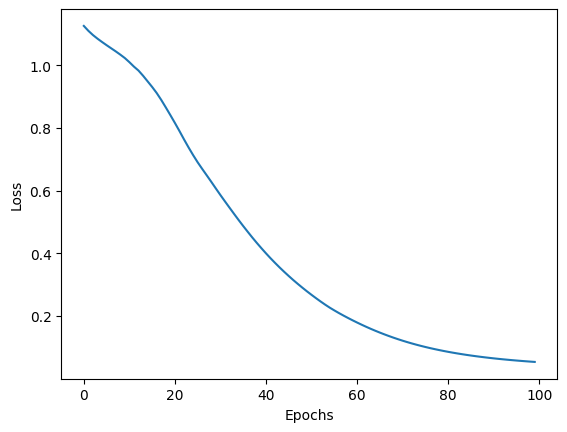

In [53]:
# Graph it out
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [54]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():     # Basically turn off back propogation
                          # As turn off the back propogation, it cannot learn anymore but can increase the calculation speed
                          # Simply we use with torch.no_grad() when we do not train anymore and test the result
  y_eval = model.forward(X_test)    # X_test are features from test set, y_eval will be predictions
                                    # X_test data are not used to learn so we can test it
  loss = criterion(y_eval, y_test)  # compare the test output and real output
  print(f'Loss on test set: {loss}')


Loss on test set: 0.13151279091835022


In [55]:
loss

tensor(0.1315)

In [56]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)     # highest value == the predicted output

    # if y_test[i] == 0:
    #   x = 'setosa'
    # elif y_test[i] == 1:
    #   x = 'versicolor'
    # else:
    #   x = 'virginica'

    # Will tell what type of flower class network thinks it is"
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'We got {correct} out of {len(y_test)}')

1.) tensor([-5.8760,  4.4628,  6.5124]) 	 2 	 2
2.) tensor([-7.5436,  4.1670,  9.7255]) 	 2 	 2
3.) tensor([-8.4504,  5.1271, 10.1987]) 	 2 	 2
4.) tensor([-4.3398,  5.6267,  2.5608]) 	 1 	 1
5.) tensor([-7.1825,  4.8754,  8.2992]) 	 2 	 2
6.) tensor([-3.3974,  5.3463,  1.2803]) 	 1 	 1
7.) tensor([-5.9231,  4.9822,  5.9997]) 	 2 	 2
8.) tensor([-4.2881,  5.7003,  2.3889]) 	 1 	 1
9.) tensor([-6.5356,  4.9257,  7.1260]) 	 2 	 2
10.) tensor([-8.0509,  4.4129, 10.3286]) 	 2 	 2
11.) tensor([-5.6762,  4.9500,  5.6215]) 	 2 	 2
12.) tensor([ 4.5662, -2.2476, -2.8911]) 	 0 	 0
13.) tensor([ 4.2571, -1.9967, -2.7330]) 	 0 	 0
14.) tensor([-2.1108,  4.0515,  0.5799]) 	 1 	 1
15.) tensor([ 3.4575, -1.2098, -2.3514]) 	 0 	 0
16.) tensor([-5.4724,  5.1165,  5.0934]) 	 2 	 1
17.) tensor([ 4.0557, -1.7949, -2.6492]) 	 0 	 0
18.) tensor([-5.8075,  4.6053,  6.2458]) 	 1 	 2
19.) tensor([ 4.4343, -2.1392, -2.8242]) 	 0 	 0
20.) tensor([ 3.4528, -1.2514, -2.3660]) 	 0 	 0
21.) tensor([-2.6189,  4.5619

In [57]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [58]:
with torch.no_grad():
  print(model.forward(new_iris))

tensor([ 4.5365, -2.2383, -2.8684])


In [59]:
newer_iris = torch.tensor([5.9,	3.0,	5.1,	1.8	])

In [60]:
with torch.no_grad():
  print(model.forward(newer_iris))

tensor([-5.9944,  4.5077,  6.6792])


In [61]:
# Save NN Model
torch.save(model.state_dict(), 'my_iris_model.pt')        # save weight, bias, model in dictionary
                                                          # save it onto googl colab unit

In [62]:
# Load the Saved Model
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))

<All keys matched successfully>

In [63]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)